In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Find Class Imbalance

In [2]:
from common.src import resample as res

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
X, y = res.to_numpy_array(path)

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
class_weights = dict(enumerate(class_weights))
print(class_weights)

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................{0: 1.9448173005219984, 1: 0.6730322580645162}


C:\Users\mmitk\Anaconda3\envs\pnenv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [3]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [4]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [5]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 100, class_weights = class_weights)

Epoch 1/100
163/163 [==============================] - 56s 342ms/step - loss: 0.6223 - tp: 3262.0000 - fp: 1890.0000 - tn: 3326.0000 - fn: 1954.0000 - accuracy: 0.6315 - precision: 0.6332 - recall: 0.6254 - auc: 0.7058 - val_loss: 0.6027 - val_tp: 171.0000 - val_fp: 133.0000 - val_tn: 171.0000 - val_fn: 133.0000 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 0.5625 - val_auc: 0.7266
Epoch 2/100
163/163 [==============================] - 53s 324ms/step - loss: 0.3770 - tp: 4315.0000 - fp: 909.0000 - tn: 4307.0000 - fn: 901.0000 - accuracy: 0.8265 - precision: 0.8260 - recall: 0.8273 - auc: 0.9050 - val_loss: 0.5811 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7422
Epoch 3/100
163/163 [==============================] - 50s 309ms/step - loss: 0.3333 - tp: 4432.0000 - fp: 785.0000 - tn: 4431.0000 - fn: 784.0000 - accuracy: 0.8496 - precision: 0.8495 - recall: 0.8497

Epoch 22/100
163/163 [==============================] - 50s 310ms/step - loss: 0.1690 - tp: 4852.0000 - fp: 367.0000 - tn: 4849.0000 - fn: 364.0000 - accuracy: 0.9299 - precision: 0.9297 - recall: 0.9302 - auc: 0.9813 - val_loss: 0.2479 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9961
Epoch 23/100
163/163 [==============================] - 56s 346ms/step - loss: 0.1699 - tp: 4876.0000 - fp: 358.0000 - tn: 4858.0000 - fn: 340.0000 - accuracy: 0.9331 - precision: 0.9316 - recall: 0.9348 - auc: 0.9814 - val_loss: 0.2499 - val_tp: 266.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 38.0000 - val_accuracy: 0.9062 - val_precision: 0.9333 - val_recall: 0.8750 - val_auc: 0.9727
Epoch 24/100
163/163 [==============================] - 61s 375ms/step - loss: 0.1598 - tp: 4894.0000 - fp: 324.0000 - tn: 4892.0000 - fn: 322.0000 - accuracy: 0.9381 - precision: 0.9379 - recall: 0.9383 - 

Epoch 43/100
163/163 [==============================] - 50s 307ms/step - loss: 0.1405 - tp: 4931.0000 - fp: 286.0000 - tn: 4930.0000 - fn: 285.0000 - accuracy: 0.9453 - precision: 0.9452 - recall: 0.9454 - auc: 0.9865 - val_loss: 0.2897 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9609
Epoch 44/100
163/163 [==============================] - 50s 308ms/step - loss: 0.1418 - tp: 4907.0000 - fp: 300.0000 - tn: 4916.0000 - fn: 309.0000 - accuracy: 0.9416 - precision: 0.9424 - recall: 0.9408 - auc: 0.9866 - val_loss: 0.2954 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9727
Epoch 45/100
163/163 [==============================] - 50s 309ms/step - loss: 0.1361 - tp: 4953.0000 - fp: 266.0000 - tn: 4950.0000 - fn: 263.0000 - accuracy: 0.9493 - precision: 0.9490 - recall: 0.9496 - 

Epoch 64/100
163/163 [==============================] - 50s 309ms/step - loss: 0.1149 - tp: 4981.0000 - fp: 229.0000 - tn: 4987.0000 - fn: 235.0000 - accuracy: 0.9555 - precision: 0.9560 - recall: 0.9549 - auc: 0.9910 - val_loss: 0.3245 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9277
Epoch 65/100
163/163 [==============================] - 50s 309ms/step - loss: 0.1148 - tp: 4975.0000 - fp: 248.0000 - tn: 4968.0000 - fn: 241.0000 - accuracy: 0.9531 - precision: 0.9525 - recall: 0.9538 - auc: 0.9906 - val_loss: 0.3176 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9512
Epoch 66/100
163/163 [==============================] - 50s 307ms/step - loss: 0.1289 - tp: 4949.0000 - fp: 264.0000 - tn: 4952.0000 - fn: 267.0000 - accuracy: 0.9491 - precision: 0.9494 - recall: 0.9488 - 

Epoch 85/100
163/163 [==============================] - 50s 306ms/step - loss: 0.1194 - tp: 4967.0000 - fp: 251.0000 - tn: 4965.0000 - fn: 249.0000 - accuracy: 0.9521 - precision: 0.9519 - recall: 0.9523 - auc: 0.9905 - val_loss: 0.2789 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9648
Epoch 86/100
163/163 [==============================] - 50s 306ms/step - loss: 0.1162 - tp: 5004.0000 - fp: 214.0000 - tn: 5002.0000 - fn: 212.0000 - accuracy: 0.9592 - precision: 0.9590 - recall: 0.9594 - auc: 0.9902 - val_loss: 0.3220 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9375
Epoch 87/100
163/163 [==============================] - 50s 308ms/step - loss: 0.1088 - tp: 5005.0000 - fp: 215.0000 - tn: 5001.0000 - fn: 211.0000 - accuracy: 0.9592 - precision: 0.9588 - recall: 0.9595 - 

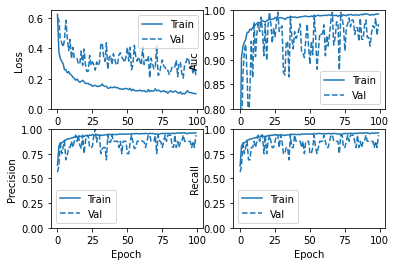

In [6]:
cnn.plot_history()

In [7]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.94      0.85      0.89       234
   PNEUMONIA       0.92      0.97      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.91      0.92       624
weighted avg       0.93      0.92      0.92       624

None


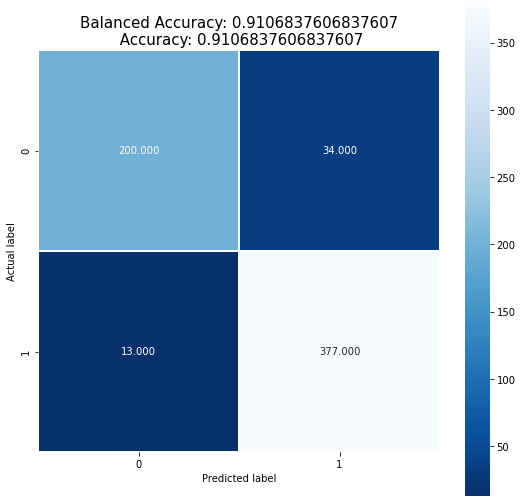

In [8]:
cnn.display_confusion_matrix(test_data_generator = test_set)